Report any problems to NOSPAM AT EXAMPLE DOT COM

In [ ]:
### Import the necessary tools and data

In [ ]:
#@title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [ ]:
#@title
%matplotlib inline

In [ ]:
url = 'https://raw.githubusercontent.com/trent5076/capstone/main/Modified%20Test%20Scores.csv'
test_scores = pd.read_csv(url)

In [ ]:
### Remove the 2013 and 2014 years, they don't contain any data

In [ ]:
test_scores = test_scores.drop(columns=['2013 [YR2013]', '2014 [YR2014]'])

In [ ]:
### Rename the series codes to be more human friendly

In [ ]:
test_scores = test_scores.replace(to_replace ="LO.PISA.MAT", value ="Math_All") 

In [ ]:
test_scores = test_scores.replace(to_replace ="LO.PISA.MAT.FE", value ="Math_Female")
test_scores = test_scores.replace(to_replace ="LO.PISA.MAT.MA", value ="Math_Male")
test_scores = test_scores.replace(to_replace ="LO.PISA.REA", value="Reading_All")
test_scores = test_scores.replace(to_replace ="LO.PISA.REA.FE", value="Reading_Female")
test_scores = test_scores.replace(to_replace ="LO.PISA.REA.MA", value ="Reading_Male")
test_scores = test_scores.replace(to_replace ="LO.PISA.SCI", value ="Science_All")
test_scores = test_scores.replace(to_replace ="LO.PISA.SCI.FE", value ="Science_Female")
test_scores = test_scores.replace(to_replace ="LO.PISA.SCI.MA", value ="Science_Male")

In [ ]:
### Remove countries with missing data

In [ ]:
test_scores = test_scores.dropna()

In [ ]:
test_scores = test_scores.rename(columns={"2015 [YR2015]": "2015_Test_Score"})

In [ ]:
### The data had ".." instead of blanks, which doesn't read as NaN, so a manual clean up is needed.

In [ ]:
index_values = test_scores[test_scores['2015_Test_Score'] == '..'].index

In [ ]:
test_scores = test_scores.drop(index_values)

In [ ]:
### Convert the scores to floats and round them to the nearest whole number

In [ ]:
test_scores['2015_Test_Score'] = test_scores['2015_Test_Score'].astype(float)

In [ ]:
test_scores['2015_Test_Score']= test_scores['2015_Test_Score'].round(decimals=0)

In [ ]:
#test_scores.head()

In [ ]:
### The series name isn't necessary, let's drop it

In [ ]:
test_scores = test_scores.drop(columns='Series Name')

In [ ]:
### Pivot the table to flatten the data. Each country will have its own row with all scores.

In [ ]:
test_scores = test_scores.pivot(index="Country Name", columns ='Series Code', values ='2015_Test_Score')

In [ ]:
#test_scores.tail()

In [ ]:
test_scores = test_scores.reset_index()

In [ ]:
reduced_test_scores = test_scores.drop(columns = ['Math_Female', 
                                                  'Math_Male', 
                                                  'Reading_Female', 
                                                  'Reading_Male', 
                                                  'Science_Female', 
                                                  'Science_Male'])

In [ ]:
#reduced_test_scores.head()

In [ ]:
#len(reduced_test_scores)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
np.random.seed(42)

x = reduced_test_scores.drop(columns = ["Country Name", "Science_All"])
y = reduced_test_scores["Science_All"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = Ridge()
model.fit(x_train, y_train)
#model.score(x_test, y_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open("ridge_model_1.pkl", "wb"))

In [ ]:
loaded_model= pickle.load(open("ridge_model_1.pkl", "rb"))

In [ ]:
#loaded_model.score(x_test, y_test)

In [ ]:
# Load and clean the 2018 data to test the model

In [ ]:
url = 'https://raw.githubusercontent.com/trent5076/capstone/main/Pisa%20mean%20performance%20scores%202018.csv'
new_test_scores = pd.read_csv(url)

In [ ]:
## Add a series code to be consistent with the other data frame

In [ ]:
new_test_scores['Series_code'] = np.where((new_test_scores["INDICATOR"] == "PISAREAD") & (new_test_scores["SUBJECT"] == "BOY"), "Reading_Male", 0)

In [ ]:
new_test_scores['Series_code'] = np.where((new_test_scores["INDICATOR"] == "PISAREAD") & (new_test_scores["SUBJECT"] == "GIRL"), "Reading_Female", 0)

In [ ]:
mask = (new_test_scores['INDICATOR'] == 'PISAREAD') & (new_test_scores['SUBJECT'] == 'BOY')
new_test_scores['Series_code'][mask] = 'Reading_Male'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mask = (new_test_scores['INDICATOR'] == 'PISAREAD') & (new_test_scores['SUBJECT'] == 'TOT')
new_test_scores['Series_code'][mask] = 'Reading_All'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mask = (new_test_scores['INDICATOR'] == 'PISAMATH') & (new_test_scores['SUBJECT'] == 'BOY')
new_test_scores['Series_code'][mask] = 'Math_Male'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mask = (new_test_scores['INDICATOR'] == 'PISAMATH') & (new_test_scores['SUBJECT'] == 'GIRL')
new_test_scores['Series_code'][mask] = 'Math_Female'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mask = (new_test_scores['INDICATOR'] == 'PISAMATH') & (new_test_scores['SUBJECT'] == 'TOT')
new_test_scores['Series_code'][mask] = 'Math_All'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mask = (new_test_scores['INDICATOR'] == 'PISASCIENCE') & (new_test_scores['SUBJECT'] == 'BOY')
new_test_scores['Series_code'][mask] = 'Science_Male'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mask = (new_test_scores['INDICATOR'] == 'PISASCIENCE') & (new_test_scores['SUBJECT'] == 'GIRL')
new_test_scores['Series_code'][mask] = 'Science_Female'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
mask = (new_test_scores['INDICATOR'] == 'PISASCIENCE') & (new_test_scores['SUBJECT'] == 'TOT')
new_test_scores['Series_code'][mask] = 'Science_All'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
## Get rid of extra columns

In [ ]:
new_test_scores = new_test_scores.drop(columns=['INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY'])

In [ ]:
## Pivot the table to match format of other data frame

In [ ]:
new_test_scores = new_test_scores.pivot(index='LOCATION', columns ='Series_code', values ='Value')

In [ ]:
#new_test_scores.head()

In [ ]:
## Drop countries with any empty values

In [ ]:
new_test_scores = new_test_scores.dropna()

In [ ]:
new_test_scores = new_test_scores.reset_index()

In [ ]:
reduced_new_test_scores = new_test_scores.drop(columns=['Math_Female',
                                                      'Math_Male',
                                                      'Reading_Female',
                                                      'Reading_Male',
                                                      'Science_Female',
                                                      'Science_Male'])

In [ ]:
## Test the model trained on 2015 data against the 2018 data

In [ ]:
np.random.seed(42)

p = reduced_new_test_scores.drop(columns = ["LOCATION", "Science_All"])
q = reduced_new_test_scores["Science_All"]


#model.score(p, q)

In [ ]:
y_preds = model.predict(p)

In [ ]:
from sklearn.metrics import mean_absolute_error
#mean_absolute_error(q, y_preds)

In [ ]:
#model.score(p, q)

In [ ]:
## Let's examine correlation for the descriptive element of this project

In [ ]:
#test_scores

In [ ]:
#test_scores.corr()

In [ ]:
import matplotlib.pyplot as plt

#plt.matshow(test_scores.corr())
#plt.show()

In [ ]:
#reduced_test_scores.corr()

In [ ]:
#reduced_new_test_scores.corr()

In [ ]:
from ipywidgets import HBox, VBox, IntSlider, interactive_output
from IPython.display import display

a = IntSlider()
b = IntSlider()

def f(a, b):
    print("{} * {} = {}".format(a, b, a * b))

out = interactive_output(f, { "a": a, "b": b })

#display(HBox([VBox([a, b]), out]))

In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Use these sliders to predict a student's science test score based on their math and reading test scores.


## All students

In [ ]:
a = widgets.IntSlider(min=300, max=600, description='Math:   ')
b = widgets.IntSlider(min=300, max=600, description='Reading:   ')

def f(a, b,):
    widget_array = [[a, b]]
    widget_frame = pd.DataFrame(widget_array)
    print('Predicted Science Score: ', loaded_model.predict(widget_frame))

out = widgets.interactive_output(f, {'a': a, 'b': b})

widgets.HBox([widgets.VBox([a, b]), out])

In [ ]:
female_test_scores = test_scores.drop(columns=['Country Name',
                                              'Math_All',
                                              'Math_Male',
                                              'Reading_All',
                                              'Reading_Male',
                                              'Science_All',
                                              'Science_Male'])

In [ ]:
np.random.seed(42)

x = female_test_scores.drop(columns = ["Science_Female"])
y = female_test_scores["Science_Female"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

female_model = Ridge()
female_model.fit(x_train, y_train)
#female_model.score(x_test, y_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
male_test_scores = test_scores.drop(columns=['Country Name',
                                              'Math_All',
                                              'Math_Female',
                                              'Reading_All',
                                              'Reading_Female',
                                              'Science_All',
                                              'Science_Female'])

In [ ]:
np.random.seed(42)

x = male_test_scores.drop(columns = ["Science_Male"])
y = male_test_scores["Science_Male"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

male_model = Ridge()
male_model.fit(x_train, y_train)
#male_model.score(x_test, y_test)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

### Female students

In [ ]:
a2 = widgets.IntSlider(min=300, max=600, description='Math:   ')
b2 = widgets.IntSlider(min=300, max=600, description='Reading:   ')

def f(a2, b2,):
    widget_array = [[a2, b2]]
    widget_frame = pd.DataFrame(widget_array)
    print('Predicted Female Science Score: ', female_model.predict(widget_frame))

out = widgets.interactive_output(f, {'a2': a2, 'b2': b2})

widgets.HBox([widgets.VBox([a2, b2]), out])

### Male students

In [ ]:
a3 = widgets.IntSlider(min=300, max=600, description='Math:   ')
b3 = widgets.IntSlider(min=300, max=600, description='Reading:   ')

def f(a3, b3,):
    widget_array = [[a3, b3]]
    widget_frame = pd.DataFrame(widget_array)
    print('Predicted Male Science Score: ', male_model.predict(widget_frame))

out = widgets.interactive_output(f, {'a3': a3, 'b3': b3})

widgets.HBox([widgets.VBox([a3, b3]), out])

## Correlation between different test scores for female students

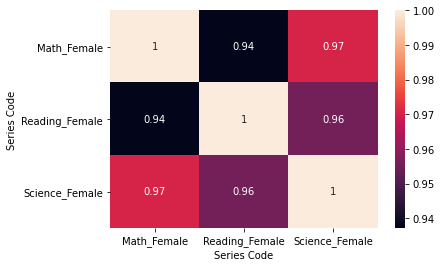

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

corrFemale = female_test_scores.corr()
sn.heatmap(corrFemale, annot=True)
plt.show()

## Correlation between different test scores for male students

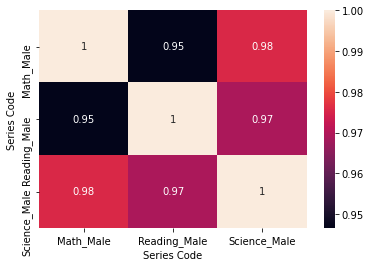

In [ ]:
corrMale = male_test_scores.corr()
sn.heatmap(corrMale, annot=True)
plt.show()

## Correlation between different test scores for all students

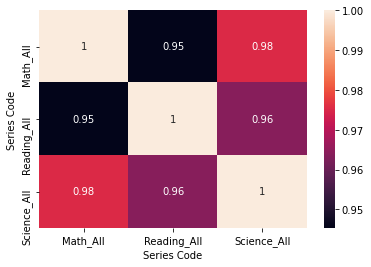

In [ ]:
corrAll = reduced_test_scores.corr()
sn.heatmap(corrAll, annot=True)
plt.show()

In [ ]:
#corrMale

In [ ]:
corrMaleColumns = []
for col in corrMale.columns:
    corrMaleColumns.append(col)
corrMaleIndexes = []
for ind in corrMale.index:
    corrMaleIndexes.append(ind)

In [ ]:
corrMaleLabels = []
for col in corrMaleColumns:
    for ind in corrMaleIndexes:
        if col != ind:
            newLabel = "{} x {}".format(col, ind)
            corrMaleLabels.append(newLabel)

In [ ]:
#corrMaleLabels

In [ ]:
#for label in corrMaleLabels:
   # print(label.split(' x '))
    

In [ ]:
splitCorrMaleLabels = []
for label in corrMaleLabels:
    item = label.split(' x ')
    splitCorrMaleLabels.append(item)
    

In [ ]:
#splitCorrMaleLabels

In [ ]:
newList = []
for q in splitCorrMaleLabels:
    khsdf = q[::-1]
    newList.append(khsdf)

In [ ]:
#newList

In [ ]:
#splitCorrMaleLabels

In [ ]:
temp_list = []
for q in newList:
    r = []
    r.append(q[1])
    r.append(q[0])
    #print(r)
    if (q not in temp_list) & (r not in temp_list):
        temp_list.append(q)

In [ ]:
#temp_list

In [ ]:
corrMaleLabels.clear()
for q in temp_list:
    newItem = "{} x {}".format(q[0], q[1])
    corrMaleLabels.append(newItem)
    

In [ ]:
#corrMaleLabels

In [ ]:
#corrMale

In [ ]:
#corrMale.reset_index()

In [ ]:
corrMale = corrMale.rename_axis(None)

In [ ]:
#corrMale

In [ ]:
corrMaleFinalList = {}
for q in corrMaleLabels:
    r = q.split(' ')[0]
    #print(r)
    for col in corrMale.columns:
        if r == col:
            s = corrMale.columns.get_loc(r)
            #print(s)
    t = q.split(' ')[2]
    #print(t)
    for ind in corrMale.index:
        if t == ind:
            u = corrMale.index.get_loc(t)
            v = corrMale.iloc[u, s]
            
            #print(u)
    #print(q, corrMale.iloc[u, s])
    
    
    corrMaleFinalList[q] = v
    
    

In [ ]:
#corrMaleFinalList

## Correlation between different test scores for male students

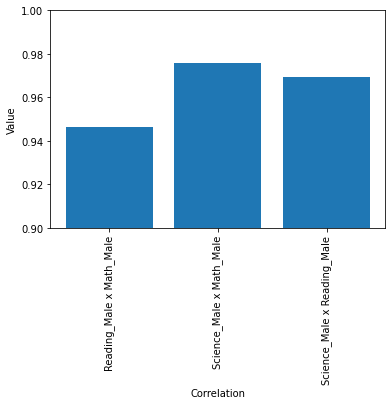

In [ ]:
fig, ax = plt.subplots()
ax.bar(corrMaleFinalList.keys(), height=corrMaleFinalList.values())
plt.xticks(rotation=90)
plt.ylim(bottom=0.90)
plt.ylim(top=1)
ax.set_ylabel('Value')
ax.set_xlabel('Correlation')

plt.show()

In [ ]:
corrFemaleColumns = []
for col in corrFemale.columns:
    corrFemaleColumns.append(col)
corrFemaleIndexes = []
for ind in corrFemale.index:
    corrFemaleIndexes.append(ind)
    
corrFemaleLabels = []
for col in corrFemaleColumns:
    for ind in corrFemaleIndexes:
        if col != ind:
            newLabel = "{} x {}".format(col, ind)
            corrFemaleLabels.append(newLabel)
            
splitCorrFemaleLabels = []
for label in corrFemaleLabels:
    item = label.split(' x ')
    splitCorrFemaleLabels.append(item)
    
newList = []
for q in splitCorrFemaleLabels:
    khsdf = q[::-1]
    newList.append(khsdf)
    
temp_list = []
for q in newList:
    r = []
    r.append(q[1])
    r.append(q[0])
    #print(r)
    if (q not in temp_list) & (r not in temp_list):
        temp_list.append(q)
        
corrFemaleLabels.clear()
for q in temp_list:
    newItem = "{} x {}".format(q[0], q[1])
    corrFemaleLabels.append(newItem)
    

corrFemale.reset_index()
corrFemale = corrFemale.rename_axis(None)

corrFemaleFinalList = {}
for q in corrFemaleLabels:
    r = q.split(' ')[0]
    #print(r)
    for col in corrFemale.columns:
        if r == col:
            s = corrFemale.columns.get_loc(r)
            #print(s)
    t = q.split(' ')[2]
    #print(t)
    for ind in corrFemale.index:
        if t == ind:
            u = corrFemale.index.get_loc(t)
            v = corrFemale.iloc[u, s]
            
            #print(u)
    #print(q, corrMale.iloc[u, s])
    
    
    corrFemaleFinalList[q] = v
    
    

In [ ]:
#corrFemaleFinalList

In [ ]:
#corrFemale

## Correlation between different test scores for female students

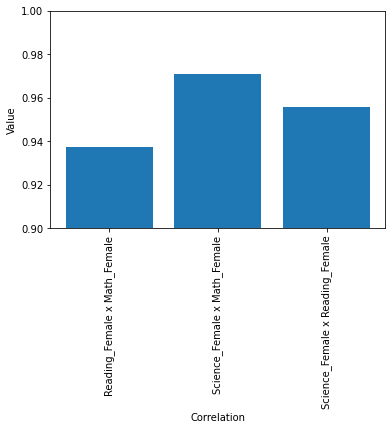

In [ ]:
fig, ax = plt.subplots()
ax.bar(corrFemaleFinalList.keys(), height=corrFemaleFinalList.values())
plt.xticks(rotation=90)
plt.ylim(bottom=0.90)
plt.ylim(top=1)
ax.set_ylabel('Value')
ax.set_xlabel('Correlation')

plt.show()

In [ ]:
corrAllColumns = []
for col in corrAll.columns:
    corrAllColumns.append(col)
corrAllIndexes = []
for ind in corrAll.index:
    corrAllIndexes.append(ind)
    
corrAllLabels = []
for col in corrAllColumns:
    for ind in corrAllIndexes:
        if col != ind:
            newLabel = "{} x {}".format(col, ind)
            corrAllLabels.append(newLabel)
            
splitCorrAllLabels = []
for label in corrAllLabels:
    item = label.split(' x ')
    splitCorrAllLabels.append(item)
    
newList = []
for q in splitCorrAllLabels:
    khsdf = q[::-1]
    newList.append(khsdf)
    
temp_list = []
for q in newList:
    r = []
    r.append(q[1])
    r.append(q[0])
    #print(r)
    if (q not in temp_list) & (r not in temp_list):
        temp_list.append(q)
        
corrAllLabels.clear()
for q in temp_list:
    newItem = "{} x {}".format(q[0], q[1])
    corrAllLabels.append(newItem)
    

corrAll.reset_index()
corrAll = corrAll.rename_axis(None)

corrAllFinalList = {}
for q in corrAllLabels:
    r = q.split(' ')[0]
    #print(r)
    for col in corrAll.columns:
        if r == col:
            s = corrAll.columns.get_loc(r)
            #print(s)
    t = q.split(' ')[2]
    #print(t)
    for ind in corrAll.index:
        if t == ind:
            u = corrAll.index.get_loc(t)
            v = corrAll.iloc[u, s]
            
            #print(u)
    #print(q, corrMale.iloc[u, s])
    
    
    corrAllFinalList[q] = v
    

In [ ]:
#corrAllFinalList

In [ ]:
#corrAll

## Correlation between test scores for all students

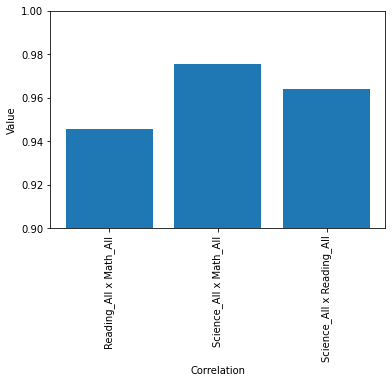

In [ ]:
fig, ax = plt.subplots()
ax.bar(corrAllFinalList.keys(), height=corrAllFinalList.values())
plt.xticks(rotation=90)
plt.ylim(bottom=0.90)
plt.ylim(top=1)
ax.set_ylabel('Value')
ax.set_xlabel('Correlation')

plt.show()

# Report a problem! E-mail example AT nospam DOT COM